In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.dirname(module_path))

from collections import defaultdict
from rl.markov_decision_process import  StateActionMapping, FinitePolicy, FiniteMarkovDecisionProcess
from rl.markov_process import FiniteMarkovRewardProcess
from rl.markov_process import StateReward
from rl.distribution import Choose,Constant,Categorical
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
from rl.dynamic_programming import policy_iteration_result, value_iteration_result
from typing import (Dict, Iterable, Generic, Sequence, Tuple,
                    Mapping, Optional, TypeVar, Generator)

In [2]:
def getMapping(n):
    N = [i for i in range(n) if i!=0] ##non-terminal states
    t = [0,n]
    actions = ["A","B"]
    rewards = {i:0 for i in range(n) if i!=0}
    rewards[0]=0
    rewards[n]=1
    mapping={}
    for i in N:
        mapping[i]={}
        for a in actions:
            if a=="A":
                d ={(i-1,rewards[i-1]):i/n,(i+1,rewards[i+1]):1-i/n}
            else:
                d = {(j,rewards[j]):1/n for j in range(n+1) if j!=i}
            mapping[i][a]= Categorical(d)
    mapping[0]=None
    mapping[n]=None
    return mapping

In [32]:
from itertools import product
## policies, each non terminal state, we can have a or b,
def getAllPolicies(n):
    ##list of all policies
    all_policies = []
    allProduct = product("AB",repeat = n-1)
    
    for scen in allProduct:
        i = 1
        d = {}
        for action in scen:
            d[i]=Constant(action)
            i+=1
        d[0] = None
        d[n] = None
        all_policies.append(FinitePolicy(d))
    return all_policies

In [30]:
def optimal_policy(n,mdp):
    ## return best policy that's strictly greater than the rest
    optimal_policy = None
    v_star = None
    for pol in getAllPolicies(n):
        mrp = mdp.apply_finite_policy(pol)
        value = mrp.get_value_function_vec(1)
        if optimal_policy is None or (v_star<value).all():
            optimal_policy=pol
            v_star=value
    return optimal_policy

In [27]:
def brute_force(mdp,n):
    pol = optimal_policy(n,mdp)
    mrp = mdp.apply_finite_policy(pol)
    value = mrp.get_value_function_vec(1)
    return value

In [28]:
mdp = FiniteMarkovDecisionProcess(getMapping(17))
opt_vf_pi, opt_policy_pi = policy_iteration_result(mdp, gamma=1)


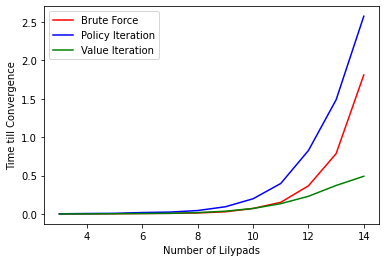

In [34]:
import time
x = range(3,15)
brute = []
policy_it = []
value_it = []
for n in x:
    mdp = FiniteMarkovDecisionProcess(getMapping(n))
    t1 = time.time()
    value = brute_force(mdp,n)
    brute.append(time.time()-t1)
    
    t1 = time.time()
    opt_vf_pi, opt_policy_pi = policy_iteration_result(mdp, gamma=1)
    policy_it.append(time.time()-t1)
    
    t1 = time.time()
    _1, _2 = value_iteration_result(mdp, gamma=1)
    value_it.append(time.time()-t1)

plt.plot(x, brute, c='r', label='Brute Force')
plt.plot(x, policy_it, c='b', label='Policy Iteration')
plt.plot(x, value_it, c='g', label='Value Iteration')
plt.xlabel('Number of Lilypads')
plt.ylabel('Time till Convergence')
plt.legend()